# 2d. Calculate closed- and open-system regassing paths

Instead of running a degassing calculation, where we decrease pressure simulating magma ascent, we can do a regassing calculation, where we increase pressure and resorb vapor into the melt.

## Python set-up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

## Define the inputs

For these types of calculations, we specify the melt composition at the start of the regassing path. 
We'll use Sari15-04-33 from Brounce et al. (2014) again assuming a temperature of 1200 °C.

For closed-system regassing calculations, we need an estimate of the bulk composition of the system - either intial CO<sub>2</sub> or wt% gas present as described in Example 2b - at the start of regassing.
For this example we'll assume the initial melt contained 3 wt% CO<sub>2</sub>-eq.

Finally, we also need to state the final pressure of the calculation, which we specify in the inputs using "final_P" in bars.

So the input file looks like below:

In [2]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'H2O': 4.17, # wt%
           'CO2ppm': 1487., # ppm
           'STppm': 1343.5, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.177,
           'initial_CO2wtpc': 3., # initial CO2 content of the system in wt%
           'final_P':5000.} # bar

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

We also need to change some model options to say its a regassing - rather than degassing - calculation.
This is done by changing "gassing_direction" to "regas" (the default is "degas").

As before (Example 2b), to use the initial CO<sub>2</sub> in the calculation, we have to change the "bulk_composition" option to "melt+vapor_initialCO2" so it knows how to calculate the bulk composition.

This gives the following models dataframe, assuming the defaults for everything else:

In [3]:
# choose the options I want - everything else will use the default options
my_models = [['gassing_direction','regas'],['bulk_composition','melt+vapor_initialCO2']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

## Run the calculation

### Closed-system regassing

VolFe will then calculate the bulk composition of the system by calculating the melt and vapor composition at Pvsat based on the input composition, and then add that vapor composition to the melt such that the bulk composition is 3 wt% CO<sub>2</sub>.

Then it will increase the pressure up to the final pressure.

In [4]:
regas1 = vf.calc_gassing(my_analysis, models=my_models)

### Open-system regassing

We can do the same assuming open-system degassing by changing the "gassing_direction" and "gassing_style" and using the default 1 bar pressure step. 

In [14]:
# choose the options I want - everything else will use the default options
my_models = [['gassing_direction','regas'],['gassing_style','open']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

In [15]:
regas2 = vf.calc_gassing(my_analysis, models=my_models)

## Plotting 

And then plot the two for comparison (closed in solid, open in dash).

(5200.0, 0.0)

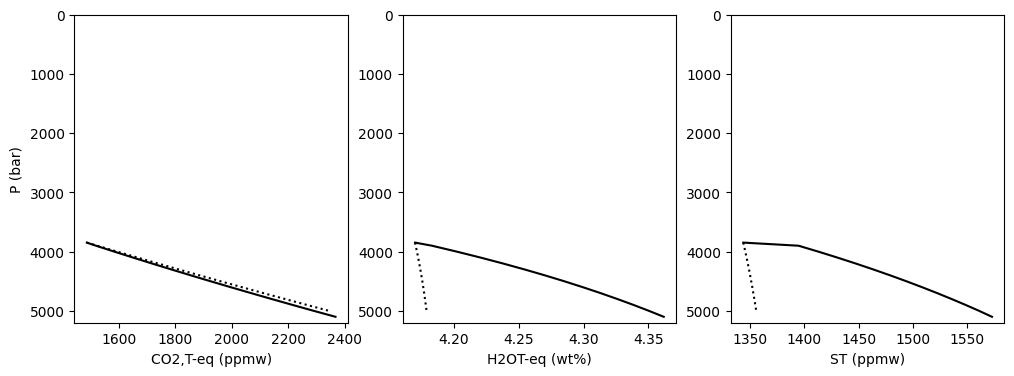

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

data1 = regas1 # closed-system
data2 = regas2 # open-system

# Plotting results
ax1.plot(data1['CO2T-eq_ppmw'], data1['P_bar'], '-k')
ax1.plot(data2['CO2T-eq_ppmw'], data2['P_bar'], ':k')
ax2.plot(data1['H2OT-eq_wtpc'], data1['P_bar'], '-k')
ax2.plot(data2['H2OT-eq_wtpc'], data2['P_bar'], ':k')
ax3.plot(data1['ST_ppmw'], data1['P_bar'], '-k')
ax3.plot(data2['ST_ppmw'], data2['P_bar'], ':k')

ax1.set_ylabel('P (bar)')
ax1.set_xlabel('CO2,T-eq (ppmw)')
ax2.set_xlabel('H2OT-eq (wt%)')
ax3.set_xlabel('ST (ppmw)')
ax1.set_ylim([5200,0])
ax2.set_ylim([5200,0])
ax3.set_ylim([5200,0])